<a href="https://colab.research.google.com/github/Udit-7/Udit-Narayan/blob/main/AB_Regression_Project_Udit_Saraswat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install  -q statsmodels
import pandas as pd,numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import chisquare
from statsmodels.stats.proportion import proportions_ztest,proportion_confint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

%matplotlib inline
sns.set(style="whitegrid")
print("Libraries loaded!")


Libraries loaded!


In [4]:
from google.colab import files
uploaded =files.upload()

Saving test_group.csv to test_group.csv


In [11]:
control=pd.read_csv("control_group.csv",delimiter=";")

test=pd.read_csv("test_group.csv",delimiter=";")

print("Contol Group Data:")
print(control.head())

print ("Test Group Data:")
print(test.head())

Contol Group Data:
      Campaign Name       Date  ...  # of Add to Cart  # of Purchase
0  Control Campaign  1.08.2019  ...            1819.0          618.0
1  Control Campaign  2.08.2019  ...            1219.0          511.0
2  Control Campaign  3.08.2019  ...            1134.0          372.0
3  Control Campaign  4.08.2019  ...            1183.0          340.0
4  Control Campaign  5.08.2019  ...               NaN            NaN

[5 rows x 10 columns]
Test Group Data:
   Campaign Name       Date  ...  # of Add to Cart  # of Purchase
0  Test Campaign  1.08.2019  ...               894            255
1  Test Campaign  2.08.2019  ...               879            677
2  Test Campaign  3.08.2019  ...              1268            578
3  Test Campaign  4.08.2019  ...               566            340
4  Test Campaign  5.08.2019  ...               956            768

[5 rows x 10 columns]


In [12]:
control["group"]="A"
test["group"]="B"

df=pd.concat([control,test],ignore_index=True)
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,group
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,A
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,A
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,A
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,A
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A


Average Purchases:
 group
A    522.793103
B    521.233333
Name: # of Purchase, dtype: float64
z= -44.88868043522187 p= 0.0


/tmp/ipython-input-2676165144.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="group",y="# of Purchase", data=df, ci=None)


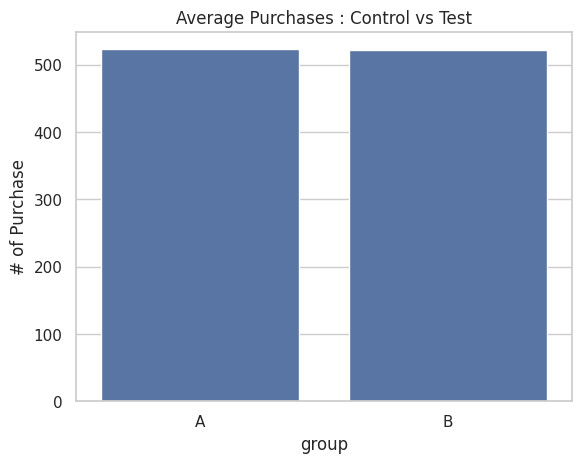

In [17]:
cr=df.groupby("group")["# of Purchase"].mean()
print("Average Purchases:\n",cr)

sucess=df.groupby("group")["# of Purchase"].sum()
total=df.groupby("group")["Reach"].sum()

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
z, p=proportions_ztest(sucess,total)

print("z=",z,"p=",p)

sns.barplot(x="group",y="# of Purchase", data=df, ci=None)
plt.title("Average Purchases : Control vs Test")
plt.show()

In [21]:
df=df.fillna(0)

In [23]:
X=df[["Spend [USD]","# of Impressions","Reach", "# of Website Clicks","# of Searches","# of View Content","# of Add to Cart"]]
Y=df["# of Purchase"]

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [27]:
Y_pred=model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)

print("Mean Suared Error:",mse)
print("R-squared:",r2)

Mean Suared Error: 38936.3720249936
R-squared: 0.1249335804879852


In [28]:
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=["Coefficient"])
print (coeff_df)

                     Coefficient
Spend [USD]             0.032783
# of Impressions        0.001402
Reach                  -0.001176
# of Website Clicks     0.003952
# of Searches           0.039016
# of View Content      -0.010006
# of Add to Cart        0.147210


In [30]:
from statsmodels.stats.proportion import proportions_ztest
from sklearn.metrics import mean_squared_error,r2_score

summary=df.groupby('group').agg(Reach=('Reach','sum'),Purchases=('# of Purchase','sum')).reset_index()
z,p=proportions_ztest(summary['Purchases'],summary['Reach'])
print(summary,f"\nZ={z:.2f},P={p:.4f},MSE={mean_squared_error(Y_test,model.predict(X_test)):.2f},R²={r2_score(Y_test,model.predict(X_test)):.2f}")


  group      Reach  Purchases
0     A  2576503.0    15161.0
1     B  1604747.0    15637.0 
Z=-44.89,P=0.0000,MSE=38936.37,R²=0.12
